<a href="https://colab.research.google.com/github/stispe/LSTM-test/blob/main/lstm%20stock%20predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simplilearn RNN tutorial:
https://www.simplilearn.com/tutorials/deep-learning-tutorial/rnn

Se også her: https://github.com/kevincwu0/rnn-google-stock-prediction


# 1. Import the required libraries

In [2]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 2. Import the training dataset

In [3]:
#Importing the training set
dataset_train = pd.read_csv("https://raw.githubusercontent.com/stispe/LSTM-test/main/Google_Stock_Price_Train.csv")

# input/ouputs of recurrent neural (input != date, stock price)
# but stock price at time t for input, and stock price t+1 for the output
# create a set only with the "Open" Google stock price, extract that column
# two-dimensional numpy array
training_set = dataset_train.iloc[:, 1:2].values

# 3. Perform feature scaling to transform the data

In [4]:
# Feature Scaling + Normalization, since LSTM Several Sigmoid Activation function
# Sigmoid 0 and 1, as is the case in Normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1)) # default is 0,1
# Fitting to training_set, scale training set, 
# transform we'll apply normalizationjust need min and max for normalization
training_set_scaled = sc.fit_transform(training_set)

# 4. Create a data structure with 60 timesteps and 1 output

In [5]:
# Creating a data structure with 60 timesteps and 1 output
x_train = []
y_train = []
for i in range(60, 1258):
  x_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshaping
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [14]:
x_train.shape

(1198, 60, 1)

# 5. Import Keras library and its packages

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# 6. Initialize the RNN

In [6]:
# Initialising the RNN
regressor = Sequential()


# 7. Add the LSTM layers and som edropout regularization

In [7]:
#Adding the first LSTM Layer and som Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [8]:
#Adding a second LSTM Layer and som Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [9]:
#Adding a third LSTM Layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [10]:
#Adding a fourth LSTM Layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# 8. Add the output layer

In [11]:
# Addint the output Layer
regressor.add(Dense(units = 1))

# 9. Compile the RNN

In [14]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# 10. Fit the RNN to the training set

In [15]:
# Fitting the RNN to the Training set
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 13s 123ms/step - loss: 0.0384
Epoch 2/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0057
Epoch 3/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0053
Epoch 4/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0056
Epoch 5/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0055
Epoch 6/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0048
Epoch 8/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0049
Epoch 9/100
38/38 [==============================] - 5s 138ms/step - loss: 0.0049
Epoch 10/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0043
Epoch 11/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0040
Epoch 13/100

11. Load the stock price test data for 2017

In [16]:
# Load teh real stoch price of 2017
dataset_test = pd.read_csv("https://raw.githubusercontent.com/stispe/LSTM-test/main/Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values

# 12. Get the predicted stock price for 2017

In [19]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60,80):
  x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


# 14. Visualize the results of predicted and real stock price

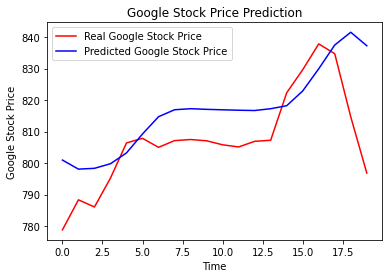

In [21]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()